#  1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime
import yfinance as yf

warnings.filterwarnings("ignore")

In [2]:
# Set the end date to today
end_date = datetime.now().date()

# Set the start date to one year ago
start_date = end_date.replace(year=end_date.year - 1)


In [3]:
# Define the list of Indian stock symbols (NSE or BSE)
stock_symbols = ["RELIANCE.NS", "TATASTEEL.NS", "HDFCBANK.NS", "INFY.NS"]

# Define the corresponding company names
company_names = ["Reliance Industries", "Tata Steel", "HDFC Bank", "Infosys"]

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.download(symbol, start=start_date, end=end_date)
    stock_data[symbol] = stock["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Print the first few rows of the stock data
print(stock_data.head())



            RELIANCE.NS  TATASTEEL.NS  HDFCBANK.NS      INFY.NS
Date                                                           
2023-09-27  2360.887207    125.619057  1506.281006  1440.137817
2023-09-28  2326.205078    124.295723  1503.173462  1413.092285
2023-09-29  2337.068115    126.354240  1505.738525  1409.165527
2023-10-03  2310.308838    125.472023  1487.734375  1407.742188
2023-10-04  2306.322266    122.825348  1508.944702  1417.902588


In [5]:
# Create an empty list to store DataFrames for each stock
stock_dfs = []

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start=start_date, end=end_date)
    stock_data["Company"] = symbol  # Add a new column with the company's symbol
    stock_dfs.append(stock_data)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(stock_dfs, axis=0)

# Print the last few rows of the data
print(data.tail())

                                  Open         High          Low        Close  \
Date                                                                            
2024-09-20 00:00:00+05:30  1905.000000  1915.000000  1867.400024  1905.750000   
2024-09-23 00:00:00+05:30  1909.000000  1918.900024  1878.449951  1896.449951   
2024-09-24 00:00:00+05:30  1888.000000  1910.900024  1871.400024  1898.599976   
2024-09-25 00:00:00+05:30  1886.349976  1901.599976  1876.800049  1895.300049   
2024-09-26 00:00:00+05:30  1897.800049  1917.949951  1893.000000  1900.250000   

                             Volume  Dividends  Stock Splits  Company  
Date                                                                   
2024-09-20 00:00:00+05:30  15242974        0.0           0.0  INFY.NS  
2024-09-23 00:00:00+05:30   3636672        0.0           0.0  INFY.NS  
2024-09-24 00:00:00+05:30   7277616        0.0           0.0  INFY.NS  
2024-09-25 00:00:00+05:30   4268341        0.0           0.0  INFY.NS  


In [6]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.0
mean,1513.758222,1526.734271,1501.190463,1514.044041,1.957801e+07,0.060306,0.0
std,946.682931,954.791119,939.030497,946.883446,2.142555e+07,0.946822,0.0
min,112.336672,116.208665,112.336672,114.297173,1.570181e+06,0.000000,0.0
25%,1055.634355,1069.329360,1052.601100,1054.905594,5.510162e+06,0.000000,0.0
50%,1525.650024,1537.200734,1512.600005,1527.540161,1.123796e+07,0.000000,0.0
75%,2033.355802,2044.403050,2010.297479,2028.117188,2.694148e+07,0.000000,0.0
max,3198.045850,3206.716576,3160.274143,3190.969971,2.226710e+08,19.500000,0.0


# 2. Exploratory Data Analysis

### 2.1 Overview of all 4 companies

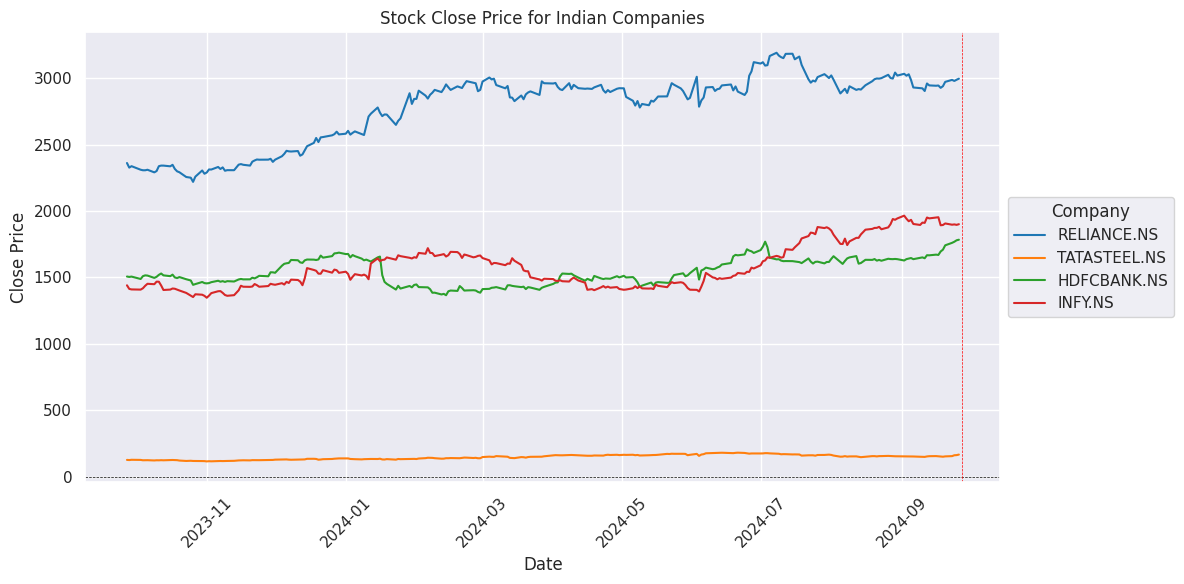

In [7]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the close prices for each company
ax = sns.lineplot(
    x=data.index,
    y="Close",
    data=data,
    hue="Company",
    palette="tab10"
)

# Set titles and labels
ax.set(
    title="Stock Close Price for Indian Companies",
    xlabel="Date",
    ylabel="Close Price"
)

# Display the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Company')

# Rotate x-axis labels
plt.xticks(rotation=45)

# grid lines
ax.grid(True)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# horizontal line at y=0 for reference
plt.axvline(end_date, color='red', linestyle='--', linewidth=0.5, label='Today')

# plot
plt.tight_layout()
plt.show()

### 2.2 Adjusted Close Price Each Stock

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')


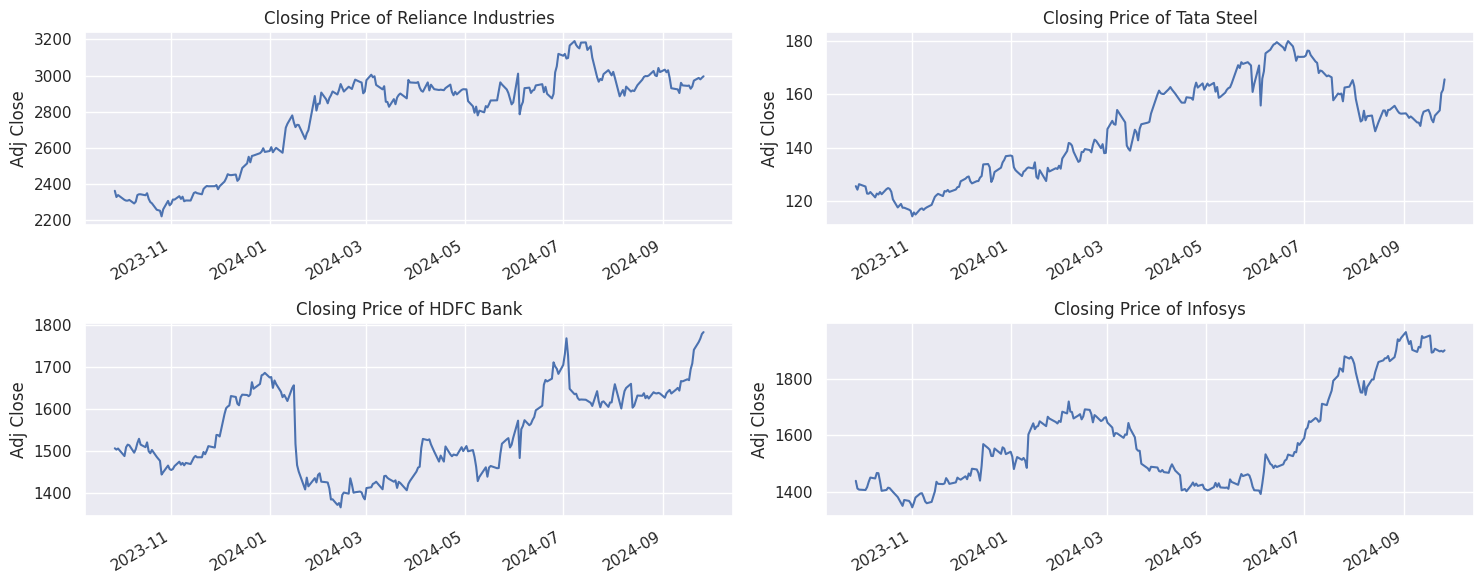

In [8]:
# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):

    print(stock_df.columns)

    # Update the column name based on the actual column name
    column_name = "Close"

    stock_df[column_name].plot(ax=ax)
    ax.set_ylabel("Adj Close")
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.3 Total Volume of Stock traded Each Day

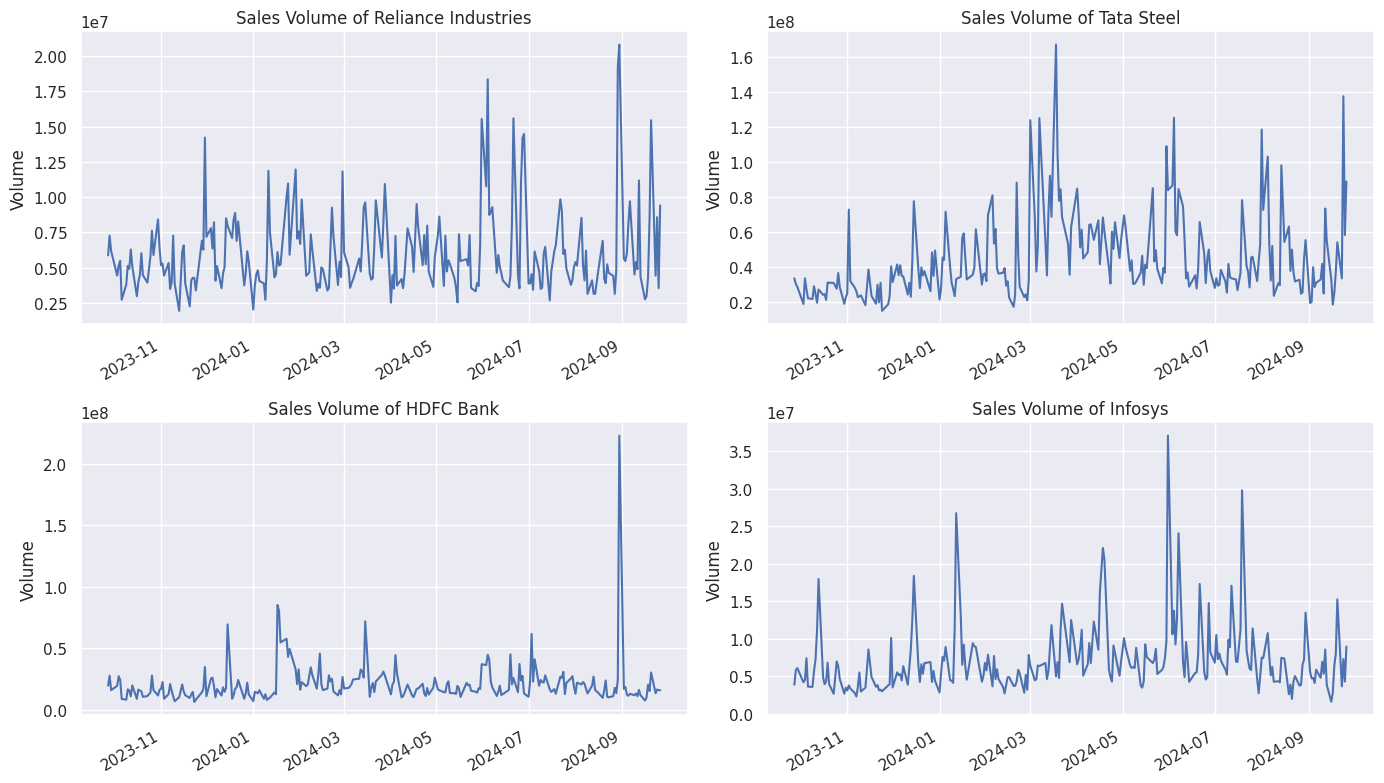

In [9]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    stock_df["Volume"].plot(ax=ax)
    ax.set_ylabel("Volume")
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.4 Moving Average of Each Stock

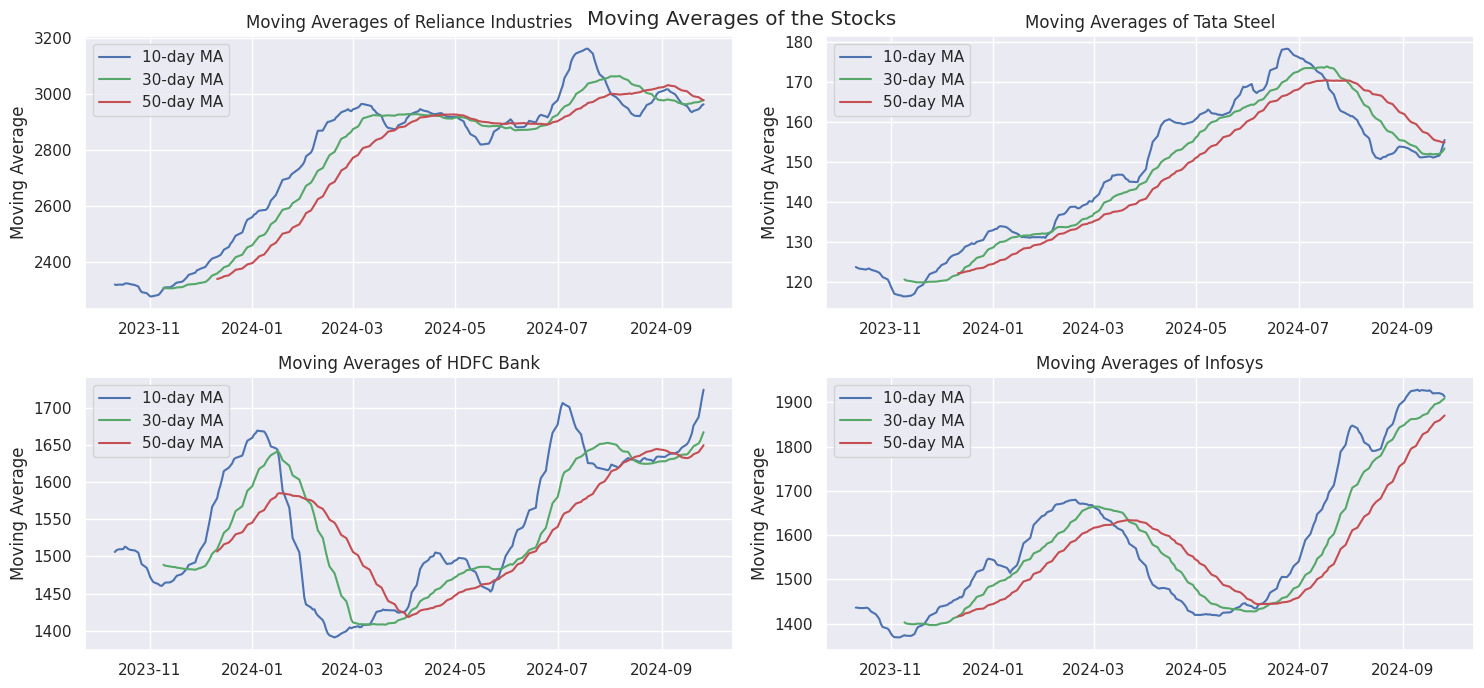

In [10]:
# Define the moving averages and line colors
moving_averages = [10, 30, 50]
line_colors = ['b', 'g', 'r']

# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    for ma, color in zip(moving_averages, line_colors):
        ma_col = f"MA for {ma} days"

        # Check if the column name exists in the DataFrame
        if "Close" in stock_df.columns:
            stock_df[ma_col] = stock_df["Close"].rolling(ma).mean()
            sns.lineplot(
                x=stock_df.index,
                y=stock_df[ma_col],
                data=stock_df,
                ax=ax,
                label=f"{ma}-day MA",
                color=color,
            )
        else:
            print(f"Closing price data not found for {company_name}")

    ax.set(
        title=f"Moving Averages of {company_name}",
        xlabel=None,
        ylabel="Moving Average",
    )

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.suptitle("Moving Averages of the Stocks")
plt.legend()
plt.show()


### 2.5 Daily Return

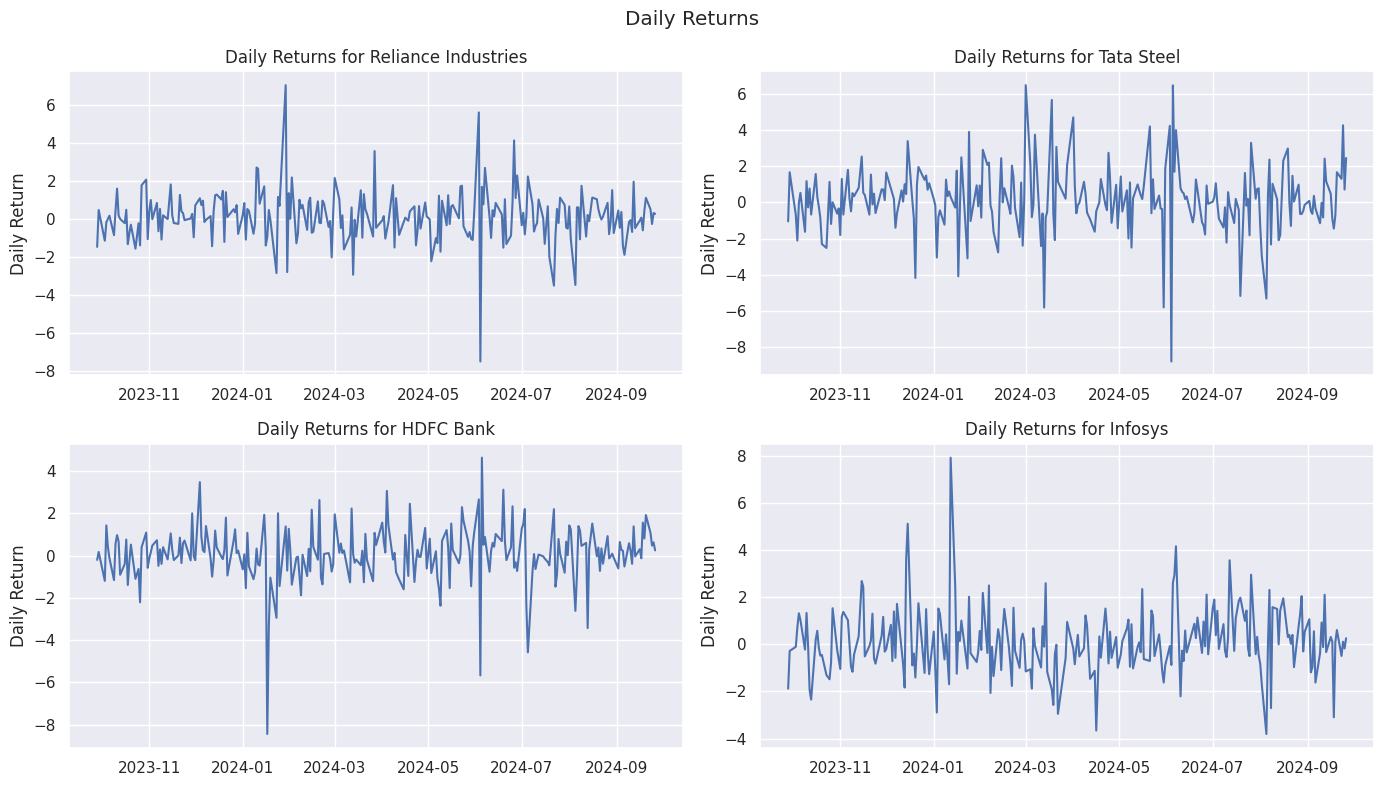

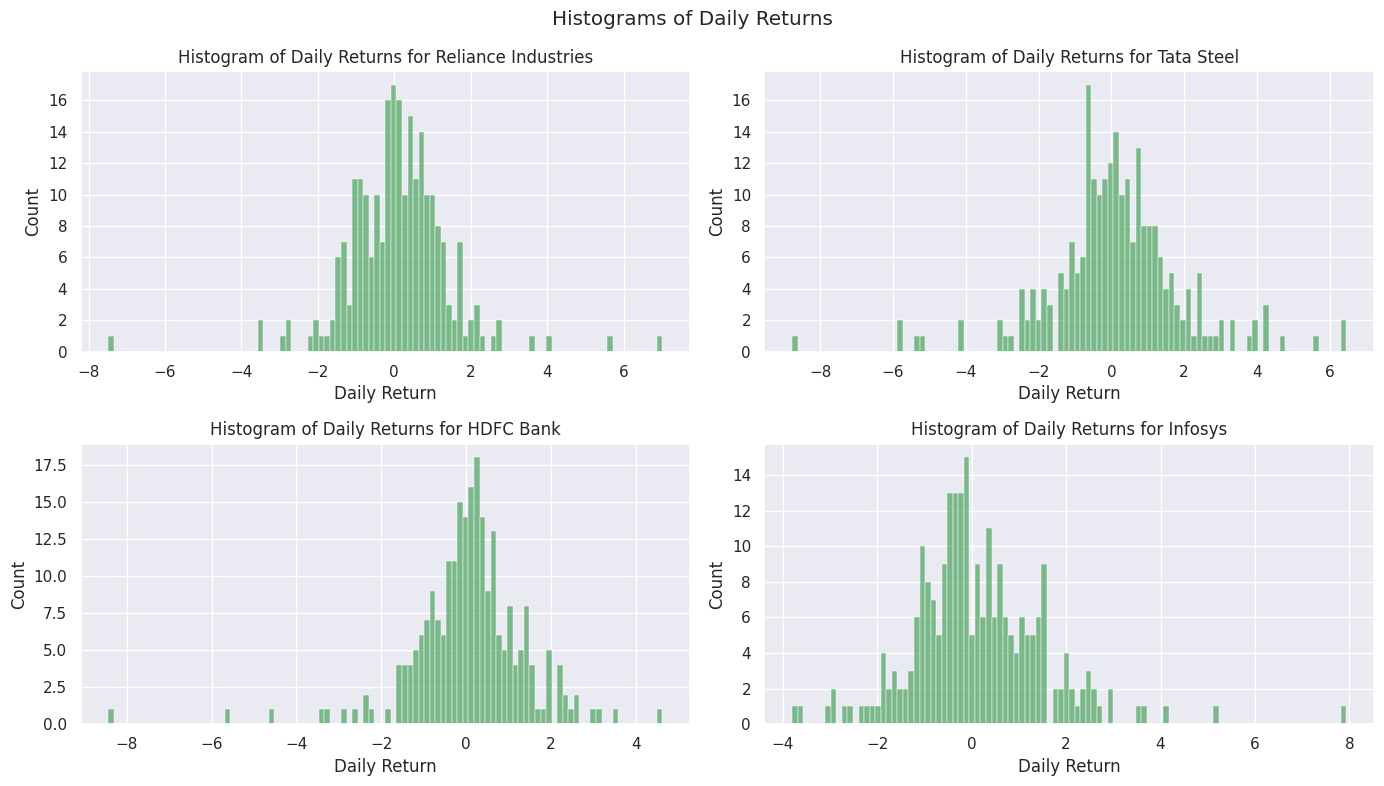

In [11]:
# daily returns for each stock
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100  # Calculate daily returns in percentage

# subplots
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        x=stock_df.index,
        y="Daily Return",
        data=stock_df,
        color='b',
    )
    plt.title(f"Daily Returns for {company_names[i-1]}")
    plt.xlabel(None)
    plt.ylabel("Daily Return")

plt.suptitle("Daily Returns")
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        stock_df["Daily Return"].dropna(),
        bins=100,
        color='g',
    )
    plt.title(f"Histogram of Daily Returns for {company_names[i-1]}")

plt.suptitle("Histograms of Daily Returns")
plt.tight_layout()

plt.show()


### 2.6 Correlation between different stocks & closing prices

In [12]:
# Create a DataFrame containing only the closing prices of Indian stocks
closing_df = data.pivot(columns='Company', values='Close')

# Print the closing prices DataFrame
print(closing_df.head())


Company                    HDFCBANK.NS      INFY.NS  RELIANCE.NS  TATASTEEL.NS
Date                                                                          
2023-09-27 00:00:00+05:30  1506.281006  1440.137817  2360.887207    125.619057
2023-09-28 00:00:00+05:30  1503.173462  1413.092285  2326.205078    124.295723
2023-09-29 00:00:00+05:30  1505.738525  1409.165527  2337.068115    126.354240
2023-10-03 00:00:00+05:30  1487.734375  1407.742188  2310.308838    125.472023
2023-10-04 00:00:00+05:30  1508.944702  1417.902588  2306.322266    122.825348


In [13]:
pct_closing = closing_df.pct_change()
pct_closing

Company,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,
2023-09-27 00:00:00+05:30,NaN,NaN,NaN,NaN
2023-09-28 00:00:00+05:30,-0.002063,-0.018780,-0.014690,-0.010534
2023-09-29 00:00:00+05:30,0.001706,-0.002779,0.004670,0.016561
2023-10-03 00:00:00+05:30,-0.011957,-0.001010,-0.011450,-0.006982
2023-10-04 00:00:00+05:30,0.014257,0.007218,-0.001726,-0.021094
...,...,...,...,...
2024-09-20 00:00:00+05:30,0.019140,0.006098,0.011057,0.016584
2024-09-23 00:00:00+05:30,0.010682,-0.004880,0.005014,0.012959
2024-09-24 00:00:00+05:30,0.004688,0.001134,-0.002678,0.042470


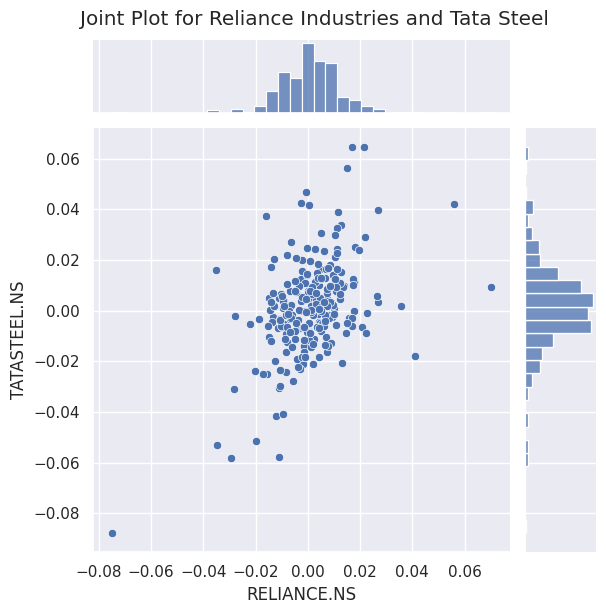

In [14]:

sns.jointplot(x=pct_closing["RELIANCE.NS"], y=pct_closing["TATASTEEL.NS"])


plt.suptitle("Joint Plot for Reliance Industries and Tata Steel", y=1.02)


plt.show()


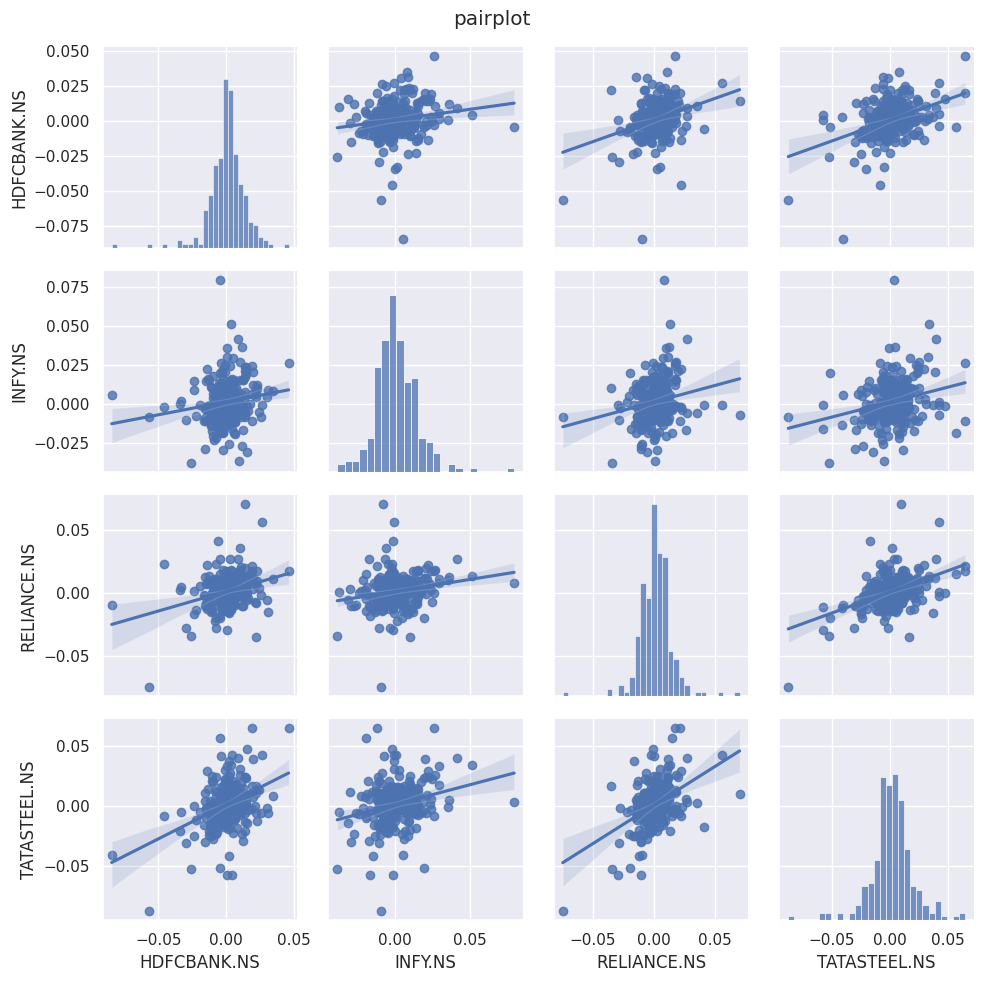

In [15]:
sns.pairplot(pct_closing, kind = "reg")
plt.suptitle("pairplot")
plt.tight_layout()

<Axes: xlabel='Company', ylabel='Company'>

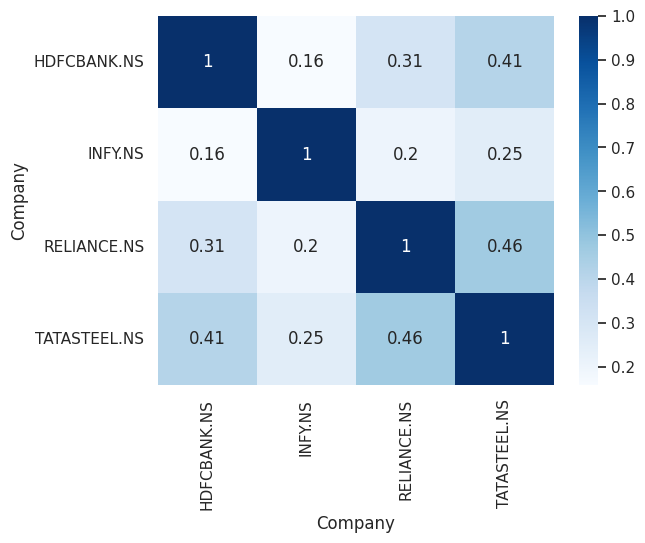

In [16]:
sns.heatmap(pct_closing.corr(), annot=  True, cmap = "Blues")

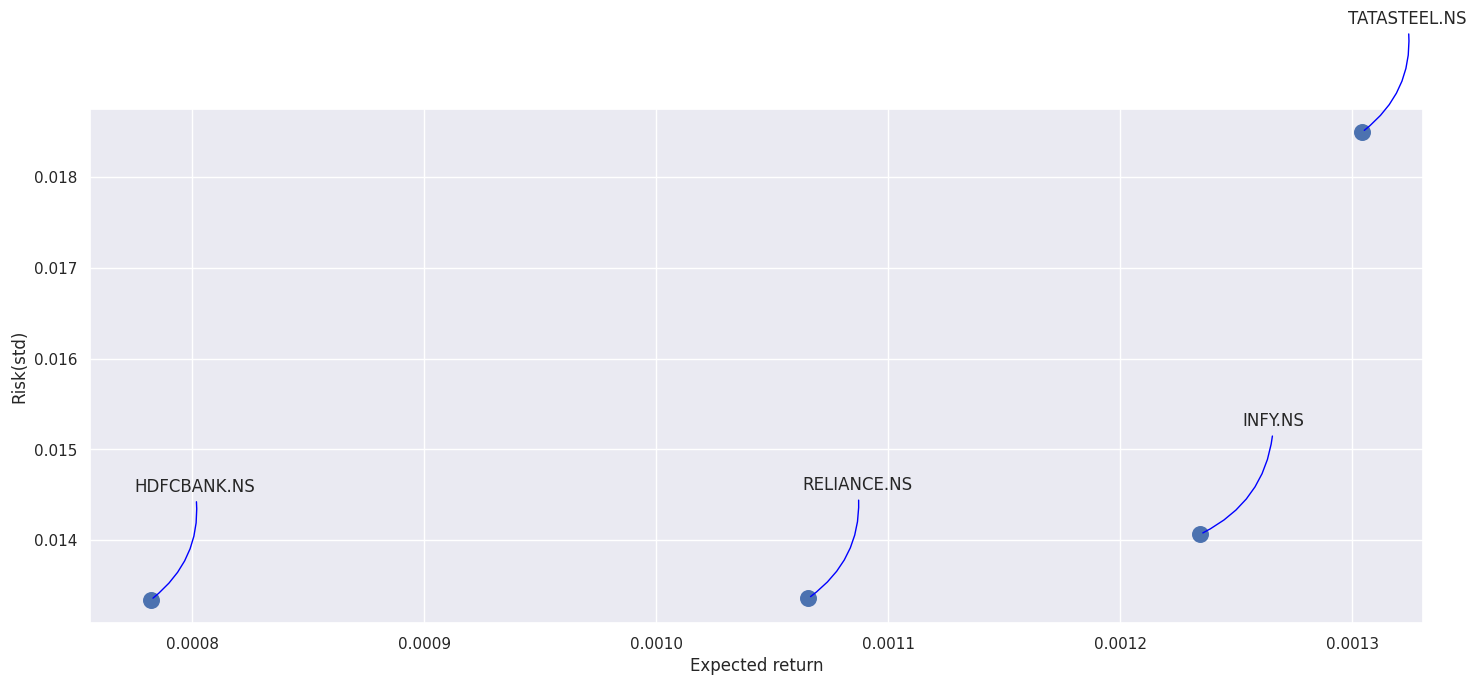

In [17]:
pct_closing = pct_closing.dropna()
area = np.pi * 40

plt.figure(figsize = (15, 7))
plt.scatter(pct_closing.mean(), pct_closing.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk(std)")

for label, x, y in zip(
    pct_closing.columns,
    pct_closing.mean(),
    pct_closing.std()
):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (75, 75),
        textcoords = "offset points",
        ha = "right",
        va = "bottom",
        arrowprops = dict(
            arrowstyle = '-',
            color = 'blue',
            connectionstyle = 'arc3,rad = -0.3'
        )
    )

plt.tight_layout()

# 3. PREDICTING STOCK PRICE


### 3.1 here using RELIANCE.NS as a test case

In [18]:

stock_symbol = 'RELIANCE.NS'
start_date = '2022-09-01'
end_date = datetime.now()

# Fetch data for Reliance using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

print(df)


[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-09-01  2383.785156  2404.367920  2354.295166  2363.248291  2346.964111   
2022-09-02  2363.248291  2377.047119  2331.220215  2335.650635  2319.556641   
2022-09-05  2336.112061  2382.723633  2336.112061  2371.924561  2355.580566   
2022-09-06  2374.878174  2405.337158  2373.955078  2396.891602  2380.375732   
2022-09-07  2376.724121  2395.091797  2372.109131  2382.954346  2366.534424   
...                 ...          ...          ...          ...          ...   
2024-09-20  2948.000000  2990.000000  2942.750000  2971.850098  2971.850098   
2024-09-23  2982.000000  3003.000000  2977.899902  2986.750000  2986.750000   
2024-09-24  2977.000000  3001.000000  2975.750000  2978.750000  2978.750000   
2024-09-25  2967.800049  2993.000000  2960.399902  2987.899902  2987.899902   
2024-09-26  2981.300049  3008.000000  2976.100098  2

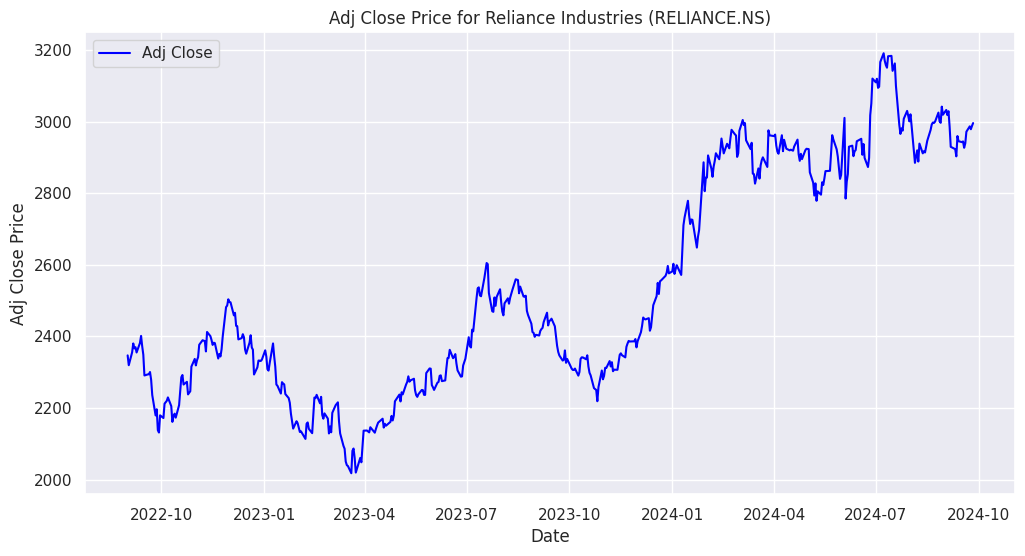

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('Adj Close Price for Reliance Industries (RELIANCE.NS)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
data = df.filter(["Close"])
dataset = data.values

training_data_len = int(
    np.ceil(len(dataset)* 0.95)
)
training_data_len

486

### LSTM are sensitive to the scale of the data so I applied minmax scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.28331788],
       [0.25973109],
       [0.2907332 ],
       [0.3120717 ],
       [0.30015999],
       [0.30303927],
       [0.29033884],
       [0.31301838],
       [0.33013654],
       [0.30536644],
       [0.28513238],
       [0.23503987],
       [0.23760366],
       [0.23791915],
       [0.24336243],
       [0.22470583],
       [0.18794515],
       [0.13891763],
       [0.15382714],
       [0.10349801],
       [0.09785775],
       [0.13923334],
       [0.13272527],
       [0.16719821],
       [0.17421895],
       [0.1823049 ],
       [0.16136077],
       [0.12357433],
       [0.13726109],
       [0.14321705],
       [0.13367174],
       [0.16368773],
       [0.1972142 ],
       [0.23085897],
       [0.2361443 ],
       [0.21326736],
       [0.21977543],
       [0.18956226],
       [0.19713532],
       [0.2562997 ],
       [0.27479834],
       [0.25921842],
       [0.27168223],
       [0.27917642],
       [0.30883748],
       [0.31976307],
       [0.31771216],
       [0.292

In [22]:
train_data = scaled_data[0: int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
"""    if i <= 61:
        print(x_train)
        print(y_train)
        print()"""

print(x_train[0])
print(y_train[0])

[0.28331788 0.25973109 0.2907332  0.3120717  0.30015999 0.30303927
 0.29033884 0.31301838 0.33013654 0.30536644 0.28513238 0.23503987
 0.23760366 0.23791915 0.24336243 0.22470583 0.18794515 0.13891763
 0.15382714 0.10349801 0.09785775 0.13923334 0.13272527 0.16719821
 0.17421895 0.1823049  0.16136077 0.12357433 0.13726109 0.14321705
 0.13367174 0.16368773 0.1972142  0.23085897 0.2361443  0.21326736
 0.21977543 0.18956226 0.19713532 0.2562997  0.27479834 0.25921842
 0.27168223 0.27917642 0.30883748 0.31976307 0.31771216 0.29286319
 0.33964241 0.32958443 0.32031539 0.30852199 0.31380732 0.31270289
 0.2758239  0.28698611 0.28067522 0.29806965 0.32844056 0.39939833]
0.40306634567984956


In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(426, 60, 1)

### **Creating the Stacked LSTM**

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

model = Sequential()

# First LSTM layer with 16 units
model.add(LSTM(16, input_shape=(x_train.shape[1], 1), return_sequences=True))

# Second LSTM layer with 16 units and swish activation
model.add(LSTM(16, return_sequences=True, activation='swish'))

# Third LSTM layer with 16 units, no return sequences and swish activation
model.add(LSTM(16, return_sequences=False, activation='swish'))

# Output layer with swish activation
model.add(Dense(1, activation='swish'))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model to the data
model.fit(x_train, y_train, batch_size=50, epochs=52)


Epoch 1/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.2548
Epoch 2/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.2345
Epoch 3/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.2076
Epoch 4/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1121
Epoch 5/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1060
Epoch 6/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0950
Epoch 7/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0738
Epoch 8/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0182
Epoch 9/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0149
Epoch 10/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0116
Epoch 11/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0117
Epoch 12/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0108
Epoch 13/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0110
Epoch 14/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0097
Epoch 15/52
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0102
Epoch 16/52
9/9 ━━━━━━━━━━━━━━━━━

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 16)              │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 16)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,181 (63.21 KB)

 Trainable params: 5,393 (21.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,788 (42.14 KB)

In [26]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
print(x_test[0])
print(y_test[0])

[0.75265938 0.72629305 0.69907183 0.70855872 0.84517703 0.65193706
 0.69206361 0.71060983 0.77616271 0.77864137 0.75347148 0.76483838
 0.76812893 0.78915381 0.7950937  0.75684737 0.78257271 0.74924072
 0.7274895  0.74915538 0.85150169 0.87974846 0.93931868 0.93034468
 0.93893412 0.91714012 0.91987501 0.9790179  1.         0.98183834
 0.97149679 0.96538601 0.99286345 0.99371812 0.9578649  0.97568478
 0.92179801 0.82868214 0.80684537 0.82017804 0.81453736 0.84295503
 0.86188581 0.85000603 0.83680147 0.85368113 0.82637437 0.73748905
 0.75240315 0.76740238 0.74056593 0.78359848 0.76022326 0.76535126
 0.76231716 0.79026471 0.80770003 0.82060537 0.82526347 0.82432325]
[2999.94995117]


In [28]:
x_test = np.array(x_test)
x_test = np.reshape(
    x_test,
    (x_test.shape[0], x_test.shape[1],1)
)

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean((pred - y_test)**2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


In [29]:
rmse

55.014691448595386

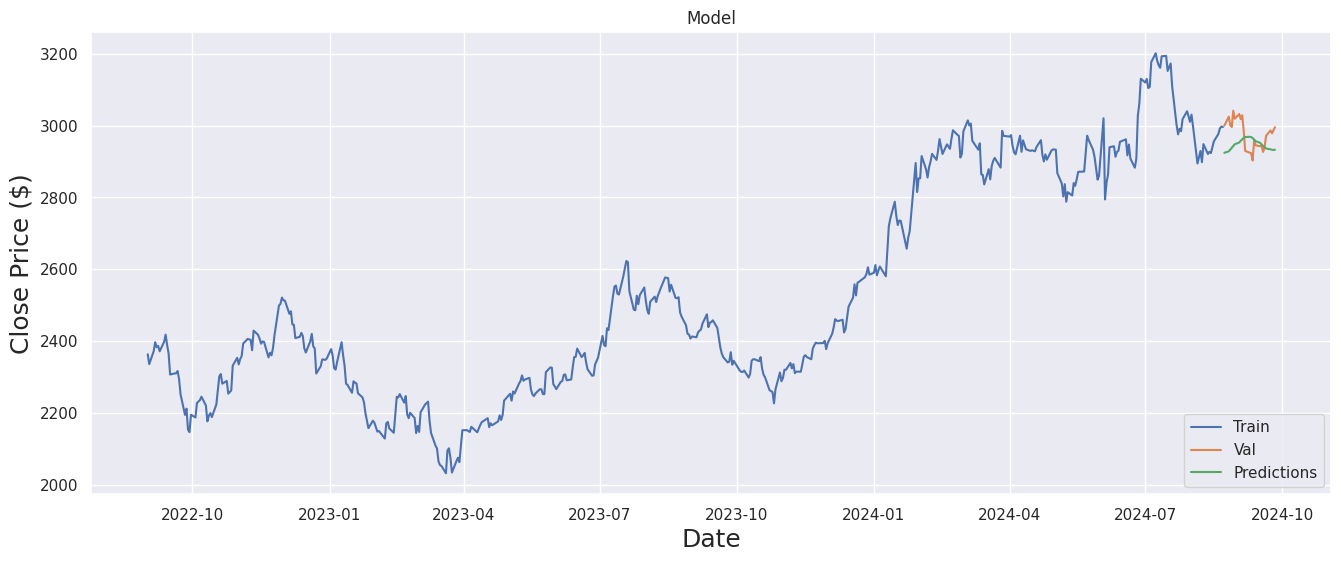

In [30]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

Epoch 1/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 2/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 3/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 4/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 5/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 7/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 8/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 9/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 11/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 12/52
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0055 - val_loss: 0.005

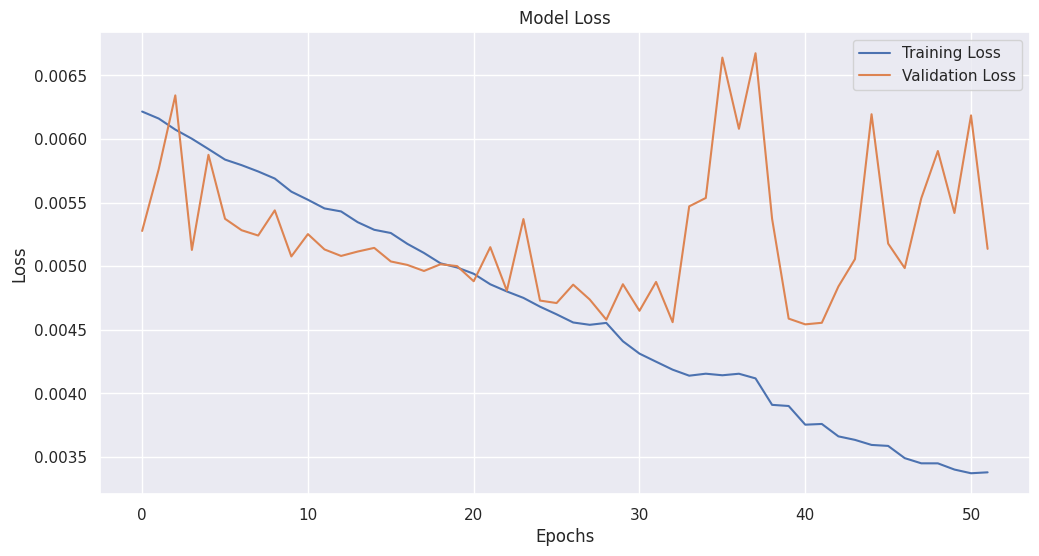

In [31]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=50, epochs=52, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# It's a regression problem, typically we don't have an accuracy metric.
